In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib
import seaborn as sns
import scipy as sc
from matplotlib import pyplot as plt
from sklearn import model_selection, datasets, metrics, tree, ensemble, preprocessing, utils, neighbors, decomposition, linear_model, pipeline, cluster, svm
from matplotlib.colors import ListedColormap 
import matplotlib.cm as cm
from keras import models, layers, utils
import xgboost as xgb
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings (category=DeprecationWarning, action='ignore')

In [ ]:
def my_custom_loss_func(y_true, y_pred):
    diff=list(y_true-y_pred)
    list_d = [x for x in diff if x <-0.05 or x > 0.05]
    return len(list_d)/len(diff)*100
myscorer = metrics.make_scorer(my_custom_loss_func, greater_is_better=True)

In [ ]:
def prep (df):
  cols=[ 'ConstrGroup', 'ExpoType', 'Seller_Cat', 'BrandR1']
  return pd.get_dummies (data=df, columns=cols)

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Samples/Common_fullset_prep_for NN_3.xlsx')        

In [ ]:
data=data.drop (['Unnamed: 0','Object_UID','Dis'], axis=1)

In [ ]:
#data1=pd.read_excel ('/content/drive/MyDrive/Colab Notebooks/!Samples/train_data_all.xlsx')

In [ ]:
data=prep(data)

In [ ]:
data

,PriceNoTax,GRP,Latitude,Longitude,Population,Size,Discount,YearNum,Month_Id,Seazon,OperatorR1,Budget,ConstrGroup_0,ConstrGroup_1,ConstrGroup_2,ConstrGroup_3,ConstrGroup_4,ExpoType_0,ExpoType_1,ExpoType_2,ExpoType_3,Seller_Cat_1,Seller_Cat_2,Seller_Cat_3,Seller_Cat_4,Seller_Cat_8,Seller_Cat_9,Seller_Cat_13,Seller_Cat_15,Seller_Cat_16,Seller_Cat_17,Seller_Cat_18,Seller_Cat_19,Seller_Cat_20,Seller_Cat_21,Seller_Cat_22,Seller_Cat_24,Seller_Cat_27,Seller_Cat_28,Seller_Cat_29,...,Seller_Cat_230,Seller_Cat_231,Seller_Cat_233,Seller_Cat_235,Seller_Cat_236,Seller_Cat_237,Seller_Cat_238,Seller_Cat_240,Seller_Cat_241,Seller_Cat_242,Seller_Cat_245,Seller_Cat_246,Seller_Cat_247,Seller_Cat_248,Seller_Cat_249,Seller_Cat_250,Seller_Cat_251,Seller_Cat_252,Seller_Cat_254,Seller_Cat_255,Seller_Cat_256,Seller_Cat_257,Seller_Cat_258,Seller_Cat_259,Seller_Cat_261,Seller_Cat_262,Seller_Cat_263,Seller_Cat_264,Seller_Cat_265,Seller_Cat_266,Seller_Cat_267,Seller_Cat_268,Seller_Cat_270,Seller_Cat_272,Seller_Cat_274,Seller_Cat_275,BrandR1_0,BrandR1_1,BrandR1_2,BrandR1_3
0,85000.0,1.750000,59.985716,30.362817,5383890,18.00,0.705900,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,120000.0,1.150000,59.957911,30.402703,5383890,18.00,0.791700,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,85000.0,0.510000,60.003023,30.331454,5383890,18.00,0.705900,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,85000.0,1.310000,59.859179,30.253073,5383890,18.00,0.705900,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,85000.0,1.180000,59.845297,30.211271,5383890,18.00,0.705900,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,25000.0,4.615938,54.726294,20.513943,489359,18.00,-0.260000,3,5,0,0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42996,17500.0,8.313029,55.070905,57.908537,190334,18.00,0.142857,3,5,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42997,12000.0,5.223071,50.266228,127.531964,226385,9.99,0.375000,3,5,0,0,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
42998,19000.0,3.200000,54.971461,73.399075,1154507,18.00,0.400000,3,5,0,2,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#tmp=data1[data1['YearNum']==3]
#tmp1=tmp[tmp['Month_Id']==11]
#len(tmp1)

In [ ]:
hold=data.iloc[-897:,:]

In [ ]:
train=data.iloc[:len(data)-len(hold),:]

In [ ]:
#df=train

In [ ]:
train=train[train['Discount']!=0]

In [ ]:
  Q1 =  train['Discount'].quantile(0.25)
  Q3 = train['Discount'].quantile(0.75)
  IQR = Q3 - Q1
  train=train[train['Discount'] > Q1-1.5*IQR] 
  train=train[train['Discount'] < Q3+1.5*IQR]

In [ ]:
df4.describe()

In [ ]:
df1=df[df['Discount']<=-0.15]
df2=df[df['Discount']>-0.15]

In [ ]:
hold_1=hold[hold['Discount']<=-0.15]
hold_2=hold[hold['Discount']>-0.15]

In [ ]:
df6.describe()

In [ ]:
df3=df1[df1['Population']<800000]
df4=df1[df1['Population']>=800000]
#df5=df1[df1['PriceNoTax']>=45000]
#df5=df2[df2['Population']<200000]
df_5=df2[df2['Population']>=200000]
df5=df2[df2['Population']<200000]
df6=df_5[df_5['Population']<750000]
df_7=df_5.copy( )
df7=df_7[df_7['Population']>=750000]

In [ ]:
df7.describe()

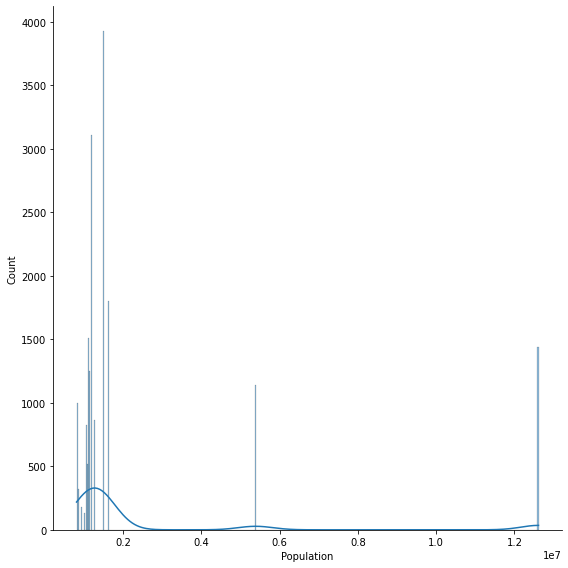

In [ ]:
sns.displot (df7['Population'],kde=True, height=8)

In [ ]:
sns.displot (data=df2['Discount'], kde=True, height=10 )

In [ ]:
train1=df5

In [ ]:
hold_labels=hold.pop('Discount')
labels=train.pop ('Discount')

In [ ]:
scaler=preprocessing.StandardScaler ()
train_data=scaler.fit_transform (train)
hold=scaler.transform (hold)

In [ ]:
train_data.shape

(36411, 222)

In [ ]:
cls=cluster.MeanShift (bandwidth=5)
labels=cls.fit_predict (train_data)
n_clusters=len(set(labels))
n_clusters

325

In [ ]:
train_data

In [ ]:
n_clusters=8
cls_M=cluster.KMeans (n_clusters=n_clusters)
labels=cls_M.fit_predict (train_data)

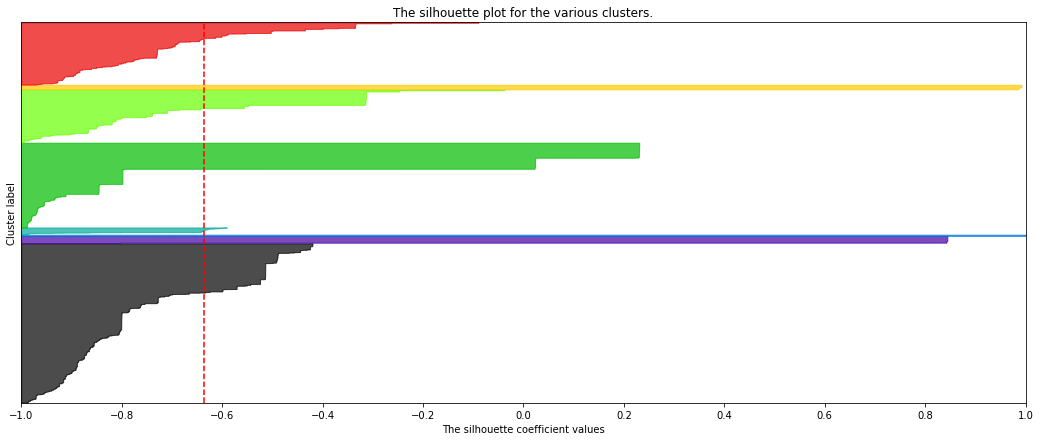

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-1, 1])
ax1.set_ylim([0, len(train) + (n_clusters + 1) * 10])
silhouette_avg = metrics.silhouette_score(train, labels)
sample_silhouette_values =  metrics.silhouette_samples(train, labels)
y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), -1, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7);

        # Label the silhouette plots with their cluster numbers at the middle
        #ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]);

In [ ]:
train['Cluster']=labels
res=[]
for i in range (0,n_clusters):
  tmp=train[train['Cluster']==i]
  #if len(tmp)>5:
  r=[i, len (tmp) ,tmp['Discount'].std () ]
  res.append(r)
std_res=np.array(res)

In [ ]:
pd.DataFrame (std_res)

,0,1,2
0,0.0,8551.0,0.189341
1,1.0,1664.0,0.152245
2,2.0,1525.0,0.074012
3,3.0,1540.0,0.191993
4,4.0,838.0,0.080065
...,...,...,...
320,320.0,1.0,NaN
321,321.0,1.0,NaN
322,322.0,1.0,NaN
323,323.0,1.0,NaN


In [ ]:
labels.shape

(36411,)

In [ ]:
m=[labels==4]
labels[m]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

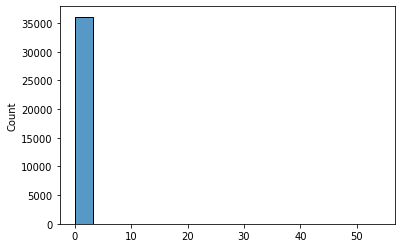

In [ ]:
sns.histplot (labels)

In [ ]:
train_data, test_data, train_labels, test_labels  = model_selection.train_test_split(train, labels, train_size=0.75, shuffle=False)

In [ ]:
scaler=preprocessing.StandardScaler ()
train_data=scaler.fit_transform (train_data)
test_data=scaler.transform (test_data)
hold=scaler.transform (hold)

In [ ]:
print (train_data.shape)
print (train_labels.shape)
print (test_data.shape)
print (test_labels.shape)
print (hold.shape)
print (hold_labels.shape)

(31577, 221)
(31577,)
(10526, 221)
(10526,)
(897, 221)
(897,)


In [ ]:
pd.DataFrame (hold).describe()

In [ ]:
myXGB=xgb.XGBRegressor (learning_rate=0.13, n_estimators=3000, min_child_weight=2, objective='reg:squarederror', booster='gbtree',   tree_method='hist', max_depth=8)

In [ ]:
myXGB.fit (train_data, train_labels, eval_set=[(train_data, train_labels),(test_data, test_labels)], eval_metric='mae', verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.13, max_delta_step=0,
             max_depth=8, min_child_weight=2, missing=None, n_estimators=3000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='hist',
             verbosity=1)

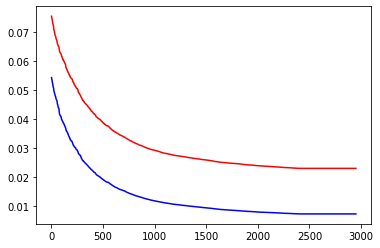

In [ ]:
his=myXGB.evals_result()
mae_train = his['validation_0']
mae1=mae_train['mae']
mae_tr=mae1[50:3000]
mae_test = his['validation_1']
mae2=mae_test['mae']
mae_ts=mae2[50:3000]
epochs = range (1, len(mae_tr)+1)
plt.plot (epochs, mae_tr, 'b' )
plt.plot (epochs, mae_ts, 'r')
plt.show()

In [ ]:
pred_XGB=myXGB.predict (test_data)
mae=metrics.mean_absolute_error (test_labels, pred_XGB)
mclf=my_custom_loss_func (test_labels, pred_XGB)
print ('mae', mae,'share', mclf)

mae 0.023061772063897812 share 11.742352270568118


In [ ]:
pred_XGB_h=myXGB.predict (hold)
mae=metrics.mean_absolute_error (hold_labels, pred_XGB_h)
mclf=my_custom_loss_func (hold_labels, pred_XGB_h)
print ('mae', mae,'share', mclf)

mae 0.18853892440146486 share 73.35562987736901


In [ ]:
fold = model_selection.KFold(n_splits=5, shuffle=True)
cvs=model_selection.cross_val_score (myXGB, train, labels, scoring=myscorer, cv=fold)
print (cvs, 'cross_val_score_share', cvs.mean(), 'std', cvs.std())

[7.62379765 8.32442703 7.94442465 7.22090261 7.90973872] cross_val_score_share 7.804658131844914 std 0.367210385252952


In [ ]:
#cvs

In [ ]:
hold_labels.shape

(874,)

In [ ]:
mKN=neighbors.KNeighborsRegressor (n_neighbors=2) 
mKN.fit (train_data, train_labels)
pred_mKN=mKN.predict(test_data)
mae=metrics.mean_absolute_error (test_labels, pred_mKN)
mclf=my_custom_loss_func (test_labels, pred_mKN)
print ('mae', mae,'share', mclf)

mae 0.04318476018281309 share 26.504534212695795


In [ ]:
mRF=ensemble.RandomForestRegressor (n_estimators=2000, max_depth=50)
mRF.fit(train_data, train_labels)
pred_RF=mRF.predict(test_data)
mae=metrics.mean_absolute_error (test_labels, pred_RF)
mclf=my_custom_loss_func (test_labels, pred_RF)
print ('mae', mae,'share', mclf)

mae 0.015961434363308505 share 8.989993746091308


In [ ]:
MyDTree=tree.DecisionTreeRegressor (  )
MyDTree.fit (train_data, train_labels)
pred_MyDtree= MyDTree.predict (test_data)
mae=metrics.mean_absolute_error (test_labels, pred_MyDtree)
mclf=my_custom_loss_func (test_labels, pred_MyDtree)
print ('mae', mae,'share', mclf)

mae 0.02393198109824811 share 11.770244821092279


In [ ]:
pred_MyDtree_h= MyDTree.predict (hold)
mae=metrics.mean_absolute_error (hold_labels, pred_MyDtree_h)
mclf=my_custom_loss_func (hold_labels, pred_MyDtree_h)
print ('mae', mae,'share', mclf)

mae 0.2830797358209062 share 83.38907469342251


In [ ]:
pca= decomposition.PCA ()
pca.fit_transform(train)
pca_variance = pca.explained_variance_
plt.figure(figsize=(8, 6))
plt.bar(range(234), pca_variance,  align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [ ]:
#pca2 = decomposition.PCA(n_components=200)
#train_data_m=pca2.fit_transform (train_data)
#test_data_m=pca2.transform (test_data)

In [ ]:
#svd=decomposition.TruncatedSVD (n_components=200)
#train_data_m=svd.fit_transform (train_data)
#test_data_m=svd.transform (test_data)

In [ ]:
##MySVM=svm.LinearSVR (max_iter=3000 )
#MySVM.fit (train_data, train_labels)
#pred_SVM=MySVM.predict (test_data)
#mae=metrics.mean_absolute_error (test_labels, pred_SVM)
#mclf=my_custom_loss_func (test_labels, pred_SVM)
#print ('mae', mae,'share', mclf)

In [ ]:
estimators = [('xgb', xgb.XGBRegressor (learning_rate=0.13, n_estimators=100, min_child_weight=1, objective='reg:squarederror', booster='gbtree',   tree_method='hist', max_depth=125)),
              ('Kneigh', neighbors.KNeighborsRegressor (n_neighbors=1) ),
             ('RF', ensemble.RandomForestRegressor (n_estimators=2000, max_depth=50) ),
            
             ('dtree', tree.DecisionTreeRegressor() )]

In [ ]:
estimators_stuck = [('Kneigh', neighbors.KNeighborsRegressor (n_neighbors=1) ),
                    ('RF', ensemble.RandomForestRegressor (n_estimators=1000, max_depth=50) ),
                    
                    ('dtree', tree.DecisionTreeRegressor() )]

In [ ]:
vote = ensemble.VotingRegressor (estimators=estimators)
vote.fit (train_data, train_labels)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.13, max_delta_step=0,
                                          max_depth=125, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_alpha=0,
                                          reg_...
                                                   random_state=None, verbose=0,
                                                   warm

In [ ]:
v_t=vote.predict (test_data)
mae=metrics.mean_absolute_error (test_labels, v_t)
mclf=my_custom_loss_func (test_labels, v_t)
print ('mae', mae,'share', mclf)

mae 0.018581189801454238 share 10.512279142126904


In [ ]:
pd.DataFrame(v_t)

In [ ]:
pd.DataFrame(test_labels)

In [ ]:
v_h=vote.predict (hold)
mae=metrics.mean_absolute_error (hold_labels, v_h)
mclf=my_custom_loss_func (hold_labels, v_h)
print ('mae', mae,'share', mclf)

mae 0.1747286980084988 share 73.91304347826086


In [ ]:
stack = ensemble.StackingRegressor (estimators=estimators_stuck, final_estimator=MyDTree)
stack.fit (train_data, train_labels)

StackingRegressor(cv=None,
                  estimators=[('Kneigh',
                               KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=1,
                                                   p=2, weights='uniform')),
                              ('RF',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=50,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                         

In [ ]:
s=stack.predict (test_data)
mae=metrics.mean_absolute_error (test_labels, s)
mclf=my_custom_loss_func (test_labels, s)
print ('mae', mae,'share', mclf)

mae 0.046114005643006904 share 22.880320035559507


In [ ]:
h=stack.predict (hold)
mae=metrics.mean_absolute_error (hold_labels, h)
mclf=my_custom_loss_func (hold_labels, h)
print ('mae', mae,'share', mclf)

mae 0.20428703922619804 share 77.8149386845039


In [ ]:
фывф

In [ ]:
mm=models.Sequential () 
mm.add (layers.Dense (128, activation='elu'))
mm.add (layers.Dense (256,  activation='elu'))
#mm.add (layers.Dense (524,  activation='elu'))
#mm.add (layers.Dropout(0.4))
#mm.add (layers.Dense (256,  activation='elu'))
#mm.add (layers.BatchNormalization ())
#mm.add (layers.Dropout(0.5))
#mm.add (layers.Dense (256, activation='elu'))
#mm.add (layers.BatchNormalization ())
mm.add (layers.Dense (1))

In [ ]:
mm.compile (optimizer='adam' , loss='mse', metrics='mae')
hst=mm.fit (train_data, train_labels, validation_data=(test_data, test_labels), batch_size=128, epochs=500)

In [ ]:
hd=hst.history
loss = hd['loss']
loss=loss[50:]
val_loss = hd['val_loss']
val_loss=val_loss[50:]
epochs = range (1, len(loss)+1)
plt.plot (epochs, loss, 'b' )
plt.plot (epochs, val_loss, 'r')
plt.show()

In [ ]:
b=mm.predict(test_data)
b.ravel()
f=b[:,0].ravel()

In [ ]:
print ('share', my_custom_loss_func (test_labels, f) )

In [ ]:
train=train.drop (['Population'], axis=1)
hold=hold.drop (['Population'], axis=1)

In [ ]:
cols_c

In [ ]:
common

In [ ]:
labels

In [ ]:
c=np.concatenate ((np.array(train), np.array(hold)), axis=0 )
common=pd.DataFrame (c, columns=cols_c)

In [ ]:
cl=np.concatenate ((np.array(labels), np.array(hold_labels)), axis=0 )
common_labels=pd.DataFrame (cl)

In [ ]:
cl_tree=cluster.AgglomerativeClustering (n_clusters=None, distance_threshold=3.0)

In [ ]:
df=cl_tree.fit (train_data)
cl_tree.n_clusters_

In [ ]:
train_data[0]

In [ ]:
cl_dbscan=cluster.DBSCAN (min_samples=15, eps=20)

In [ ]:
df=cl_dbscan.fit_predict (train_data)

In [ ]:
df.max()

In [ ]:
train['Cluster']=df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train

,PriceNoTax,GRP,Latitude,Longitude,Population,Size,YearNum,Month_Id,Seazon,OperatorR1,Budget,ConstrGroup_0,ConstrGroup_1,ConstrGroup_2,ConstrGroup_3,ConstrGroup_4,ExpoType_0,ExpoType_1,ExpoType_2,ExpoType_3,Seller_Cat_1,Seller_Cat_2,Seller_Cat_3,Seller_Cat_4,Seller_Cat_8,Seller_Cat_9,Seller_Cat_13,Seller_Cat_15,Seller_Cat_16,Seller_Cat_17,Seller_Cat_18,Seller_Cat_19,Seller_Cat_20,Seller_Cat_21,Seller_Cat_22,Seller_Cat_24,Seller_Cat_27,Seller_Cat_28,Seller_Cat_29,Seller_Cat_30,...,Seller_Cat_231,Seller_Cat_233,Seller_Cat_235,Seller_Cat_236,Seller_Cat_237,Seller_Cat_238,Seller_Cat_240,Seller_Cat_241,Seller_Cat_242,Seller_Cat_245,Seller_Cat_246,Seller_Cat_247,Seller_Cat_248,Seller_Cat_249,Seller_Cat_250,Seller_Cat_251,Seller_Cat_252,Seller_Cat_254,Seller_Cat_255,Seller_Cat_256,Seller_Cat_257,Seller_Cat_258,Seller_Cat_259,Seller_Cat_261,Seller_Cat_262,Seller_Cat_263,Seller_Cat_264,Seller_Cat_265,Seller_Cat_266,Seller_Cat_267,Seller_Cat_268,Seller_Cat_270,Seller_Cat_272,Seller_Cat_274,Seller_Cat_275,BrandR1_0,BrandR1_1,BrandR1_2,BrandR1_3,Cluster
0,85000.0,1.750000,59.985716,30.362817,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
1,120000.0,1.150000,59.957911,30.402703,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
2,85000.0,0.510000,60.003023,30.331454,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
3,85000.0,1.310000,59.859179,30.253073,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
4,85000.0,1.180000,59.845297,30.211271,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42098,10500.0,40.450000,52.756792,103.621072,76047,18.00,3,3,1,1,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1
42099,21000.0,3.969063,52.307217,104.291990,623562,18.00,3,3,1,2,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
42100,22000.0,3.050000,57.146031,65.590307,807271,18.00,3,3,1,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
42101,15000.0,11.934893,56.595650,84.911490,106516,18.00,3,3,1,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1


In [ ]:
train[train['Cluster']==-1]

,PriceNoTax,GRP,Latitude,Longitude,Population,Size,YearNum,Month_Id,Seazon,OperatorR1,Budget,ConstrGroup_0,ConstrGroup_1,ConstrGroup_2,ConstrGroup_3,ConstrGroup_4,ExpoType_0,ExpoType_1,ExpoType_2,ExpoType_3,Seller_Cat_1,Seller_Cat_2,Seller_Cat_3,Seller_Cat_4,Seller_Cat_8,Seller_Cat_9,Seller_Cat_13,Seller_Cat_15,Seller_Cat_16,Seller_Cat_17,Seller_Cat_18,Seller_Cat_19,Seller_Cat_20,Seller_Cat_21,Seller_Cat_22,Seller_Cat_24,Seller_Cat_27,Seller_Cat_28,Seller_Cat_29,Seller_Cat_30,...,Seller_Cat_231,Seller_Cat_233,Seller_Cat_235,Seller_Cat_236,Seller_Cat_237,Seller_Cat_238,Seller_Cat_240,Seller_Cat_241,Seller_Cat_242,Seller_Cat_245,Seller_Cat_246,Seller_Cat_247,Seller_Cat_248,Seller_Cat_249,Seller_Cat_250,Seller_Cat_251,Seller_Cat_252,Seller_Cat_254,Seller_Cat_255,Seller_Cat_256,Seller_Cat_257,Seller_Cat_258,Seller_Cat_259,Seller_Cat_261,Seller_Cat_262,Seller_Cat_263,Seller_Cat_264,Seller_Cat_265,Seller_Cat_266,Seller_Cat_267,Seller_Cat_268,Seller_Cat_270,Seller_Cat_272,Seller_Cat_274,Seller_Cat_275,BrandR1_0,BrandR1_1,BrandR1_2,BrandR1_3,Cluster
0,85000.0,1.750000,59.985716,30.362817,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
1,120000.0,1.150000,59.957911,30.402703,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
2,85000.0,0.510000,60.003023,30.331454,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
3,85000.0,1.310000,59.859179,30.253073,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
4,85000.0,1.180000,59.845297,30.211271,5383890,18.00,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42098,10500.0,40.450000,52.756792,103.621072,76047,18.00,3,3,1,1,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1
42099,21000.0,3.969063,52.307217,104.291990,623562,18.00,3,3,1,2,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
42100,22000.0,3.050000,57.146031,65.590307,807271,18.00,3,3,1,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1
42101,15000.0,11.934893,56.595650,84.911490,106516,18.00,3,3,1,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1


In [ ]:
bw=cluster.estimate_bandwidth (train)

In [ ]:
ms = cluster.MeanShift (bandwidth=bw,  min_bin_freq=1, cluster_all=False)
ms.fit(train)
labels_ms= ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels_ms)
n_clusters_ = len(labels_unique)

In [ ]:
n_clusters_

In [ ]:
train['Cluster']=labels_ms

In [ ]:
cols_c=train.columns.to_list()

In [ ]:
cols_c.append('Discount')

In [ ]:
labels

In [ ]:
c_fin.shape

In [ ]:
c_fin=np.concatenate ((np.array(common), np.array(common_labels)), axis=1 )
common_fin=pd.DataFrame (c_fin, columns=cols_c)

In [ ]:
train['Cluster']=labels

In [ ]:
train

,PriceNoTax,GRP,Latitude,Longitude,Population,Size,Discount,YearNum,Month_Id,Seazon,OperatorR1,Budget,ConstrGroup_0,ConstrGroup_1,ConstrGroup_2,ConstrGroup_3,ConstrGroup_4,ExpoType_0,ExpoType_1,ExpoType_2,ExpoType_3,Seller_Cat_1,Seller_Cat_2,Seller_Cat_3,Seller_Cat_4,Seller_Cat_8,Seller_Cat_9,Seller_Cat_13,Seller_Cat_15,Seller_Cat_16,Seller_Cat_17,Seller_Cat_18,Seller_Cat_19,Seller_Cat_20,Seller_Cat_21,Seller_Cat_22,Seller_Cat_24,Seller_Cat_27,Seller_Cat_28,Seller_Cat_29,...,Seller_Cat_231,Seller_Cat_233,Seller_Cat_235,Seller_Cat_236,Seller_Cat_237,Seller_Cat_238,Seller_Cat_240,Seller_Cat_241,Seller_Cat_242,Seller_Cat_245,Seller_Cat_246,Seller_Cat_247,Seller_Cat_248,Seller_Cat_249,Seller_Cat_250,Seller_Cat_251,Seller_Cat_252,Seller_Cat_254,Seller_Cat_255,Seller_Cat_256,Seller_Cat_257,Seller_Cat_258,Seller_Cat_259,Seller_Cat_261,Seller_Cat_262,Seller_Cat_263,Seller_Cat_264,Seller_Cat_265,Seller_Cat_266,Seller_Cat_267,Seller_Cat_268,Seller_Cat_270,Seller_Cat_272,Seller_Cat_274,Seller_Cat_275,BrandR1_0,BrandR1_1,BrandR1_2,BrandR1_3,Cluster
0,85000.0,1.750000,59.985716,30.362817,5383890,18.00,0.705900,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,120000.0,1.150000,59.957911,30.402703,5383890,18.00,0.791700,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,85000.0,0.510000,60.003023,30.331454,5383890,18.00,0.705900,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,85000.0,1.310000,59.859179,30.253073,5383890,18.00,0.705900,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,85000.0,1.180000,59.845297,30.211271,5383890,18.00,0.705900,2,4,1,2,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42098,10500.0,40.450000,52.756792,103.621072,76047,18.00,0.161905,3,3,1,1,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2
42099,21000.0,3.969063,52.307217,104.291990,623562,18.00,0.571429,3,3,1,2,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
42100,22000.0,3.050000,57.146031,65.590307,807271,18.00,0.590909,3,3,1,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
42101,15000.0,11.934893,56.595650,84.911490,106516,18.00,0.333333,3,3,1,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2


In [ ]:
res=[]
for i in range (0,n_clusters):
  tmp=train[train['Cluster']==i]
  if len(tmp)>5:
      r=[i, len (tmp) ,tmp['Discount'].std () ]
      res.append(r)
std_res=np.array(res)

In [ ]:
pd.DataFrame (std_res)

,0,1,2
0,0.0,11083.0,0.193360
1,1.0,2017.0,0.155036
2,2.0,23311.0,0.187797


In [ ]:
c_fin=np.concatenate ((np.array(train), np.array(labels)), axis=1 )
common_fin=pd.DataFrame (c_fin, columns=cols_c)

In [ ]:
c_fin=np.column_stack((np.array(train), np.array(labels)))
common_fin=pd.DataFrame (c_fin, columns=cols_c)

In [ ]:
common_fin

In [ ]:
n_clusters

3

In [ ]:
res=[]
for i in range (0,n_clusters_):
  tmp=common_fin[common_fin['Cluster']==i]
  if len(tmp)>5:
      r=[i, len (tmp) ,tmp['Discount'].std () ]
      res.append(r)
std_res=np.array(res)


In [ ]:
pd.DataFrame (std_res)

In [ ]:
cols_c

In [ ]:
  res=[]
  clust=cluster.KMeans (n_clusters=7, n_init=500, max_iter=5000)
  labels_m=clust.fit_predict(train)
  cluster_centers = clust.cluster_centers_
  labels_unique = np.unique(labels_m)
  n_clusters_ = len(labels_unique)
  train['Cluster']=labels_m
  cols_c=train.columns.to_list()
  cols_c.append('Discount')
  c_fin=np.column_stack((np.array(train), np.array(labels)))
  common_fin=pd.DataFrame (c_fin, columns=cols_c)


In [ ]:
  hold['Cluster']=clust.predict(hold)
  hold_fin=np.column_stack((np.array(hold), np.array(hold_labels)))
  hold_fin=pd.DataFrame (hold_fin, columns=cols_c)

In [ ]:
fin_res=[]
res=[]
for i in range (0, n_clusters_):
      #locals() ['data_cl_' + str(i)] =common_fin[common_fin['Cluster']==i].drop (['Cluster'], axis=1)
      #locals() ['hold_cl' + str(i)] =hold_fin[hold_fin['Cluster']==i].drop (['Cluster'], axis=1)
      tmp_train=common_fin[common_fin['Cluster']==i].drop (['Cluster'], axis=1)
      tmp_hold=hold_fin[hold_fin['Cluster']==i].drop (['Cluster'], axis=1)
      tmp_train_labels=tmp_train.pop ('Discount')
      tmp_hold_labels=tmp_hold.pop ('Discount')
      
      train_data, test_data, train_labels, test_labels  = model_selection.train_test_split(tmp_train, tmp_train_labels, train_size=0.8, shuffle=True)
      MyDTree=tree.DecisionTreeRegressor ( criterion='mse')
      MyDTree.fit (train_data, train_labels)
      pred_MyDtree= MyDTree.predict (test_data)
      sh_t=my_custom_loss_func (test_labels, pred_MyDtree)
      mae=metrics.mean_absolute_error(test_labels, pred_MyDtree)
      lt=len (tmp_train_labels)
      lh=len (tmp_hold_labels)
      if lh!=0  : 
        pred_MyDtree_h= MyDTree.predict (tmp_hold)
        sh_h=my_custom_loss_func (tmp_hold_labels, pred_MyDtree_h)
        mae_h=metrics.mean_absolute_error(tmp_hold_labels, pred_MyDtree_h)
      else : 
        sh_h=-1
        mae_h=-1
      fin_res.append([i,lt, sh_t, sh_h, mae, mae_h])
      res.append([i, lt, sh_t, sh_h, mae, mae_h])
      print ('cluster', i, 'size', lh, 'share_test', round (sh_t,4), 'share_hold', round (sh_h,4))
df=pd.DataFrame (res, columns=['cluster', 'size', 'share_test', 'share_hold', 'mae', 'mae_h'])

In [ ]:
#common_fin=common_fin.drop(['Discount'], axis=1)

In [ ]:
data_cl_0=common_fin[common_fin['Cluster']==0]
data_cl_1=common_fin[common_fin['Cluster']==1]
data_cl_2=common_fin[common_fin['Cluster']==2]

In [ ]:
train, labels=datasets.load_boston(return_X_y=True)

In [ ]:
labels

In [ ]:
sns.heatmap(data.corr()[['Discount']].sort_values(by='Discount', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
cls=data.columns.to_list()

In [ ]:
tmp_data=data.iloc[:-1457,:]
temp_hold=data.iloc[-1457:,:]
tmp_data_2=temp_hold.iloc[-897:,:]
hold=temp_hold.iloc[:560,:]


In [ ]:
dt=np.concatenate ((np.array(tmp_data), np.array(tmp_data_2)), axis=0 )
train=pd.DataFrame (dt, columns=cls)

In [ ]:
hold

In [ ]:
tmp=data[data['YearNum']==3]
tmp1=tmp[tmp['Month_Id']==4]
len (tmp1)

In [ ]:
750+147

In [ ]:
#sns.boxplot (data['Discount'])

In [ ]:
#data['BrandR1']=data['BrandR1'].fillna(1)
#data['Latitude']=data['Latitude'].fillna(data['Latitude'].mean())
#data['Longitude']=data['Longitude'].fillna(data['Longitude'].mean())
#data['Size']=data['Size'].fillna(data['Size'].median())
#data=data.dropna()

In [ ]:
#data=data.drop (['Object_UID', 'Summ2PayOperNoTax', 'CityType','AgentName', 'OperatorR2'], axis=1)

In [ ]:
data=data_cl_2.drop (['Cluster'], axis=1)

In [ ]:
data

In [ ]:
col_cat= ['YearNum',
  'Month_Id',
 'BrandR1',
 'Seazon',
 'ConstrGroup',
 'ExpoType',
 'OperatorR1',
 'Budget',
 'GRP',
 'Latitude',
 'Longitude',
 'Population',
 'Size',
 'Seller_Cat']

In [ ]:
data=pd.get_dummies (data, columns=['Seller_Cat'])

In [ ]:
train=data

In [ ]:
hold

In [ ]:
hold_labels=hold.pop('Discount')

In [ ]:
hold['Cluster']=ms.predict(hold)

In [ ]:
h_fin=np.column_stack((np.array(hold), np.array(hold_labels)))
h_fin=pd.DataFrame (h_fin, columns=cols_c)

In [ ]:
cols_c

In [ ]:
h_fin

In [ ]:
hold_0=h_fin[h_fin['Cluster']==0]
hold_1=h_fin[h_fin['Cluster']==1]
hold_2=h_fin[h_fin['Cluster']==2]

In [ ]:
hold_0=hold_0.drop (['Cluster'], axis=1)
hold_1=hold_1.drop (['Cluster'], axis=1)
hold_2=hold_2.drop (['Cluster'], axis=1)

In [ ]:
hold_labels_0=hold_0.pop('Discount')
hold_labels_1=hold_1.pop('Discount')
hold_labels_2=hold_2.pop('Discount')

In [ ]:
hold_labels_2

In [ ]:
train=train[train['Budget']==5]
hold=hold[hold['Budget']==5]

In [ ]:
sns.boxplot (train['Discount'])

In [ ]:
Q1 =  train['Discount'].quantile(0.25)
Q3 = train['Discount'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
train=train[train['Discount'] > Q1-1.5*IQR] 
train=train[train['Discount'] < Q3+1.5*IQR]

In [ ]:
train

In [ ]:
hold['Cat']=0

In [ ]:
for i in range(0, len(hold)):
  if hold.iat[i,0] in train['Object_UID'].values: 
    hold.iat[i,17]=1


In [ ]:
hold_new=hold[hold['Cat']==0]
hold_uses=hold[hold['Cat']==1]



In [ ]:
hold=hold.drop (['Object_UID'], axis=1)
#hold_uses=hold_uses.drop (['Object_UID', 'Cat'], axis=1)
train=train.drop (['Object_UID'], axis=1)

In [ ]:
hold_new=hold_new.drop (['Object_UID', 'Cat'], axis=1)
hold_uses=hold_uses.drop (['Object_UID', 'Cat'], axis=1)
train=train.drop (['Object_UID'], axis=1)

In [ ]:
#train=train[train['YearNum']!=1]

In [ ]:
hold_uses= hold_uses[hold_uses['Population']==1493749]
hold_new= hold_new[hold_new['Population']==1493749]

In [ ]:
hold_new_labels=hold_new.pop('Discount')
hold_uses_labels=hold_uses.pop('Discount')

In [ ]:
train=train[train['Population']==1493749]
hold=hold[hold['Population']==1493749]

In [ ]:
labels=train.pop ('y')

In [ ]:
sns.violinplot (data=train, x='PriceNoTax')

In [ ]:
Q1 =  train['PriceNoTax'].quantile(0.25)
Q3 = train['PriceNoTax'].quantile(0.75)
IQR = Q3 - Q1
train=train[train['PriceNoTax'] > Q1-1.0*IQR] 
train=train[train['PriceNoTax'] < Q3+1.0*IQR]

In [ ]:
train=train.drop (['Population'], axis=1)
hold=hold.drop (['Population'], axis=1)

In [ ]:
hold_labels=hold.pop('Discount')
labels=train.pop ('Discount')
train_data, test_data, train_labels, test_labels  = model_selection.train_test_split(train, labels, train_size=0.8, shuffle=True)

In [ ]:
print (train_data.shape)
print (test_data.shape)
print (train_labels.shape)
print (test_labels.shape)
print (hold.shape)
print (hold_labels.shape)

In [ ]:
scaler=preprocessing.StandardScaler ()
X=scaler.fit_transform (train)
Ht=scaler.transform (hold)

In [ ]:
#X=train.values 
y=labels.values
#Ht=hold.values
Hl=hold_labels.values 

In [ ]:
y=labels

In [ ]:
X[505]

In [ ]:
train

In [ ]:
Ht[0]

In [ ]:
X = np.hstack ((X, np.ones_like (y).reshape (X.shape[0],1)))
Ht = np.hstack ((Ht, np.ones_like (Hl).reshape (Ht.shape[0],1)))

In [ ]:
y=y*100
Hl=Hl*100

In [ ]:
X.shape

In [ ]:
def mserror(y, y_pred):
    return sum (list(map (lambda y, y_pred : (y-y_pred)**2, y, y_pred)))/y.size

In [ ]:
def stochastic_gradient_step(X, y, w, train_ind, eta):
    #gr = sc.misc.derivative (loss_func, X[train_ind].dot(w), args=[y[train_ind]], dx=1e-1, n=1) 
    #gr = sc.misc.derivative (mse, X[train_ind].dot(w), args=[y[train_ind]], dx=1e-4, n=1) /y.size
    #gr = (X[train_ind].dot(w) - y[train_ind])/y.size
    w_res=[]
    for k in range (0, len(X[0])):
      res=[]
      
      for i in range (train_ind, train_ind+8):
         gr = sc.misc.derivative (mse, X[i].dot(w), args=[y[i]], dx=0.001, n=1)
         res.append (X[i,k]*gr)
      w_res.append(sum(res)/y.size)
      
      #globals() ['grad' + str(k)]=sum(res)/y.size  
    return  w - eta * np.array(w_res)
    #return  w - eta * np.array([grad0, grad1, grad2, grad3,grad4,grad5,grad6,grad7,grad8,grad9,grad10,grad11,grad12,grad13])

In [ ]:
def stochastic_gradient_descent(X, y, w_init, eta=0.01,max_iter=1e10,min_weight_dist=1e-6,verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    nu=eta
    errors = []
    w_fin=[]
    mse_errors=[]
    #past_velo=0
    #moment=0.05
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed()
            # Основной цикл
    while  iter_num < max_iter:
      #weight_dist > min_weight_dist and 
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0]-8)
        w_calc=stochastic_gradient_step (X,y,w,random_ind, nu)
        weight_dist = np.linalg.norm(w-w_calc)
        errors.append (my_custom_loss_func (y, np.dot(X,w_calc)))
        w_fin.append(w)
        mse=metrics.mean_squared_error (y, np.dot(X,w_calc) )
        mae=metrics.median_absolute_error (y, np.dot(X,w_calc) )
        mse_errors.append (mse)
        #velo=past_velo* moment+eta*gr
        w=w_calc
        #past_velo=velo
        iter_num=iter_num+1
        #nu=0.9/(1.0+iter_num/1000)
        print (w[13],'X ', round (np.dot(X[random_ind],w_calc),2), ' y_', round (y[random_ind], 2),'Step ' ,iter_num, 'idx',random_ind, '__mse_', round (mse, 2), '__mae_', round (mae, 2)) 
    return w, errors,w_fin, mse_errors

In [ ]:
stochastic_gradient_step (X, y, w_init, 2, 0.1 )

In [ ]:
sc.misc.derivative (mse, X[1].dot(w_init), args=[y[1]], dx=0.001, n=1)

In [ ]:
w_init=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [ ]:
metrics.mean_squared_error (y, y_res )

In [ ]:
diff=list(y-y_res)
list_d = [x for x in diff if x <-0.05*100 or x > 0.05*100]

In [ ]:
len(list_d)

In [ ]:
sns.violinplot (diff)

In [ ]:
def f (y):
   return  (y*0.0001)**3+0.5

In [ ]:
def loss_func(y, x):
    l=math.floor ((np.abs(x-y)*20))
    return math.pow(l, 0.05)

In [ ]:
def mse(y, x):
     return (y-x)**2

In [ ]:
stoch_grad_desc_weights, stoch_errors_by_iter, fin_wts, mse_errors = stochastic_gradient_descent (X, y, w_init=QW, max_iter=60000)

In [ ]:
X.shape

In [ ]:
round (np.dot(X[2],QW),4)7

In [ ]:
y[2]

In [ ]:
y_res=np.dot(X,QW)

In [ ]:
my_custom_loss_func(y_res, y)

In [ ]:
stoch_grad_desc_weights

In [ ]:
fin_wts[-1]

In [ ]:
QW=fin_wts[-1]

In [ ]:
QW=np.array([ 6.31475466, -1.34333134,  0.95260193,  0.76207203, -2.56487635,
       -2.60061439,  0.42789848, -0.75977096,  0.39278589, -0.76071839,
        0.27577702, -1.49753141,  2.11887571, -1.24013815, -0.29867952,
       39.36831252])

In [ ]:
QW.shape

In [ ]:
sns.lineplot (x=range(0,40000), y=stoch_errors_by_iter[0:40000])

In [ ]:
sns.lineplot (x=range(0,40000), y=mse_errors[0:40000])

In [ ]:
mse_errors[702]

In [ ]:
stoch_errors_by_iter[702]

In [ ]:
np.argmin(stoch_errors_by_iter)

In [ ]:
w_f=w_fin[1231]

In [ ]:
hold_0

In [ ]:
#hold_new=pd.read_excel ('~/samples/hold_new.xlsx')
#hold_uses=pd.read_excel ('~/samples/hold_uses.xlsx')

In [ ]:
#hold_new=hold_new.drop (['ML_Object_UID', 'DateStart','AgentName', 'Summ2PayOperNoTax'], axis=1)
#hold_uses=hold_uses.drop (['ML_Object_UID', 'DateStart','AgentName', 'Summ2PayOperNoTax'], axis=1)

In [ ]:
#hold_new=pd.get_dummies (hold_new, columns=col_cat)
#hold_uses=pd.get_dummies (hold_uses, columns=col_cat)

In [ ]:
print (hold_new.shape)
#print (hold_new_labels.shape)
print (hold_uses.shape)
#print (hold_uses_labels.shape)

In [ ]:
pop=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Samples/Pop.xlsx')

In [ ]:
pop

In [ ]:
hold_new_labels

In [ ]:
MyDTree=tree.DecisionTreeRegressor ( criterion='mse')
MyDTree.fit (train_data, train_labels)
pred_MyDtree= MyDTree.predict (test_data)
mae=metrics.mean_absolute_error(test_labels, pred_MyDtree)
mse=metrics.mean_squared_error (test_labels, pred_MyDtree)
print ('mae', mae, 'mse', mse, 'share', my_custom_loss_func (test_labels, pred_MyDtree))

In [ ]:
pred_MyDtree_h= MyDTree.predict (hold)
mae=metrics.mean_absolute_error (hold_labels, pred_MyDtree_h)
print ('mae', mae, 'share', my_custom_loss_func (hold_labels, pred_MyDtree_h))

In [ ]:
pred_MyDtree_h_0= MyDTree.predict (hold_0)
mae=metrics.mean_absolute_error (hold_labels_0, pred_MyDtree_h_0)
print ('mae', mae, 'share', my_custom_loss_func (hold_labels_0, pred_MyDtree_h_0))

In [ ]:
pred_MyDtree_h_1= MyDTree.predict (hold_1)
mae=metrics.mean_absolute_error (hold_labels_1, pred_MyDtree_h_1)
print ('mae', mae, 'share', my_custom_loss_func (hold_labels_1, pred_MyDtree_h_1))

In [ ]:
pred_MyDtree_h_2= MyDTree.predict (hold_2)
mae=metrics.mean_absolute_error (hold_labels_2, pred_MyDtree_h_2)
print ('mae', mae, 'share', my_custom_loss_func (hold_labels_2, pred_MyDtree_h_2))

In [ ]:
diff=list(hold_labels_0-pred_MyDtree_h_0)
list_d = [x for x in diff if x <-0.05 or x > 0.05]

In [ ]:
len(list_d)

In [ ]:
im=MyDTree.feature_importances_

In [ ]:
data=pd.DataFrame({'feature':train.columns.values,"importance":im})
data=data.sort_values (['importance'], axis=0, ascending=False)
sns.barplot(data=data.iloc[:25,:],y='feature',x='importance')

In [ ]:
pred_MyDtree_h

In [ ]:
diff=list(hold_labels-pred_MyDtree_h)
list_d = [x for x in diff if x <-0.05 or x > 0.05]
list_d1 = [x for x in list_d if x <0.6 and x > -0.6]

In [ ]:
q1=pd.DataFrame(diff).mean()
q3 = pd.DataFrame(list_d).quantile(0.75)
iqr = q3 - q1
q1

In [ ]:
len(list_d)

In [ ]:
len(list_d1)/len(diff)*100

In [ ]:
sns.boxplot (list_d)

In [ ]:
pred_MyDtree_n= MyDTree.predict (hold_new)
mae=metrics.mean_absolute_error (hold_new_labels, pred_MyDtree_n)
print ('mae', mae, 'share', my_custom_loss_func (hold_new_labels, pred_MyDtree_n))

In [ ]:
pred_MyDtree_u= MyDTree.predict (hold_uses)
mae=metrics.mean_absolute_error (hold_uses_labels, pred_MyDtree_u)
print ('mae', mae, 'share', my_custom_loss_func (hold_uses_labels, pred_MyDtree_u))

In [ ]:
#fold = model_selection.KFold(n_splits=3, shuffle=True)
#cvs=model_selection.cross_val_score (myXGB, hold, hold_labels, scoring=myscorer, cv=fold)
#print ('cross_val_score_share', cvs, 'std', cvs.std())

In [ ]:
pred_XGB_n=myXGB.predict (hold_new)
mae=metrics.mean_absolute_error (hold_new_labels, pred_XGB_n)
print ('mae', mae*100, 'share', my_custom_loss_func (hold_new_labels, pred_XGB_n) )

In [ ]:
pred_XGB_u=myXGB.predict (hold_uses)
mae=metrics.mean_absolute_error (hold_uses_labels, pred_XGB_u)
print ('mae', mae*100, 'share', my_custom_loss_func (hold_uses_labels, pred_XGB_u) )

In [ ]:
len(list_d)

In [ ]:
train=np.array(train)

In [ ]:
KF=model_selection.KFold (n_splits=3, shuffle=True )
for train_index, test_index in KF.split (train):
    train_data=train[train_index]
    test_data=train[test_index]
    train_labels=train_data[:, 1] 
    test_labels=test_data[:, 1]
    train_data = np.delete(train_data, 1, 1)
    test_data = np.delete(test_data, 1, 1)
    myXGB=xgb.XGBRegressor (learning_rate=0.45,n_estimators=2000,  objective='reg:squarederror', booster='gbtree', tree_method='hist', max_depth=125)
    myXGB.fit (train_data, train_labels)
    a=myXGB.predict (np.array(hold_uses))
    print ('share', my_custom_loss_func (hold_uses_labels, a) )

In [ ]:
for column in col_cat:
 
  temp_data=train.drop (column, axis=1)
  tmp_u=hold_uses.drop (column, axis=1)
  train_data, test_data = model_selection.train_test_split(temp_data, train_size=0.8)
  test_labels=test_data.pop ('Discount').values
  train_labels=train_data.pop ('Discount').values
  tmp_u_labels=tmp_u.pop ('Discount').values
  myXGB=xgb.XGBRegressor (learning_rate=0.43, n_estimators=1500, objective='reg:squarederror', booster='gbtree', tree_method='hist', max_depth=50)
  myXGB.fit (train_data, train_labels)
  a=myXGB.predict (tmp_u)
  mae=metrics.mean_absolute_error (tmp_u_labels, a)
  loss=my_custom_loss_func (tmp_u_labels, a)
  cvs=model_selection.cross_val_score (myXGB, tmp_u, tmp_u_labels, scoring=myscorer, cv=3)
  print (column, 'mae', round (mae*100, 2), 'cvs', round(cvs.mean(),2), 'std', round(cvs.std(),2) ,'share', round(loss,2) )

In [ ]:
finres=[]
for i in range (1, 9):
  res=[]
  train=data[data['City_Cat']==i]
  train=np.array(train)
  for train_index, test_index in KF.split (train):
    train_data=train[train_index]
    test_data=train[test_index]
    train_labels=train_data[:, 1] 
    test_labels=test_data[:, 1]
    train_data = np.delete(train_data, 1, 1)
    test_data = np.delete(test_data, 1, 1)
    myXGB=xgb.XGBRegressor (learning_rate=0.45, n_estimators=2000,  objective='reg:squarederror', booster='gbtree', tree_method='hist', max_depth=125)
    myXGB.fit (train_data, train_labels)
    a=myXGB.predict (hold_uses)
    res.append(my_custom_loss_func (hold_uses_labels, a))
  finres.append(np.array(res).mean())
  print ('town', i, 'count', len (train), np.array(res).mean())  

In [ ]:
cols=['YearNum', 'Budget']

In [ ]:
pop.iat[6,1]

In [ ]:
train

In [ ]:
hold_uses[hold_uses['Budget']==5]

In [ ]:
for i in range (0,6):
  temp_data=train[train['Budget']==i]
  temp_u=hold_uses[hold_uses['Budget']==i]
  train_data=temp_data
  #train_data, test_data = model_selection.train_test_split(temp_data, train_size=0.8)
  #test_labels=test_data.pop ('Discount').values
  train_labels=train_data.pop ('Discount').values
  temp_u_labels=temp_u.pop ('Discount').values
  myXGB=xgb.XGBRegressor (learning_rate=0.43, n_estimators=1500, objective='reg:squarederror', booster='gbtree', tree_method='hist', max_depth=50)
  myXGB.fit (train_data, train_labels)
  a=myXGB.predict (temp_u)
  mae=metrics.mean_absolute_error (temp_u_labels, a)
  loss=my_custom_loss_func (temp_u_labels, a)
  cvs=model_selection.cross_val_score (myXGB, temp_u, temp_u_labels, scoring=myscorer, cv=3)
  print (len (train_data), 'mae', round (mae*100, 2), 'cvs', round(cvs.mean(),2), 'std', round(cvs.std(),2) ,'share', round(loss,2) )

In [ ]:
pop=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/!Samples/Pop.xlsx')

In [ ]:
pop

In [ ]:
train.describe()

In [ ]:
for i in range (0,7):
  temp_data=train[train['Population']==pop.iat[i,1]]
  temp_n=hold_new[hold_new['Population']==pop.iat[i,1]]
  train_data=temp_data
  #train_data, test_data = model_selection.train_test_split(temp_data, train_size=0.8)
  #test_labels=test_data.pop ('Discount').values
  train_labels=train_data.pop ('Discount').values
  temp_n_labels=temp_n.pop ('Discount').values
  myXGB=xgb.XGBRegressor (learning_rate=0.43, n_estimators=1500, objective='reg:squarederror', booster='gbtree', tree_method='hist', max_depth=50)
  myXGB.fit (train_data, train_labels)
  a=myXGB.predict (temp_n)
  mae=metrics.mean_absolute_error (temp_n_labels, a)
  loss=my_custom_loss_func (temp_n_labels, a)
  cvs=model_selection.cross_val_score (myXGB, temp_n, temp_n_labels, scoring=myscorer, cv=3)
  print (len (temp_n), 'mae', round (mae*100, 2), 'cvs', round(cvs.mean(),2), 'std', round(cvs.std(),2) ,'share', round(loss,2) )

In [ ]:
pop

In [ ]:
with pd.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/!Samples/cluster_2.xlsx') as writer:
    pd.DataFrame (data_cl_2).to_excel(writer, index=False)